<a href="https://colab.research.google.com/github/SusanMezaImata17/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel("/content/Compartido_BBDD_Plt_01.xlsx")
df

,Año,Mes,Ciudad,Moneda,Ventas,Gastos,MN
0,2018,enero,Lima,PEN,100000.000000,91960.000000,0.080400
1,2018,febrero,Lima,PEN,104000.000000,95721.600000,0.079600
2,2018,marzo,Lima,PEN,108160.000000,99507.200000,0.080000
3,2018,abril,Lima,PEN,106213.120000,97673.585152,0.080400
4,2018,mayo,Lima,PEN,107275.251200,98639.593478,0.080500
...,...,...,...,...,...,...,...
283,2023,agosto,Iquitos,PEN,65994.561179,55776.572506,0.154831
284,2023,septiembre,Iquitos,PEN,67314.452402,57022.590433,0.152892
285,2023,octubre,Iquitos,PEN,68660.741450,58112.338925,0.153631
286,2023,noviembre,Iquitos,PEN,71407.171108,60436.832482,0.153631


# Ejercicio 1

Haz un grafico de lineas evolutivo de las ventas mes a mes de Lima.

In [ ]:
filtrado = df[df['Ciudad'] == 'Lima']
graf=filtrado.groupby(['Año_Mes'])[['Ventas']].sum()
graf

,Ventas
Año_Mes,
2018-abril,106213.120000
2018-agosto,107586.023312
2018-diciembre,111016.890815
2018-enero,100000.000000
2018-febrero,104000.000000
...,...
2023-marzo,196765.522687
2023-mayo,200720.509693
2023-noviembre,219714.372641


In [ ]:

df['Mes_Año']=df['Mes'].str.slice(stop=3) + df['Año'].astype(str).str.slice(start=2)
df.head()

,Año,Mes,Ciudad,Moneda,Ventas,Gastos,MN,Año_Mes,Mes_Año
0,2018,enero,Lima,PEN,100000.0000,91960.000000,0.0804,2018-enero,ene18
1,2018,febrero,Lima,PEN,104000.0000,95721.600000,0.0796,2018-febrero,feb18
2,2018,marzo,Lima,PEN,108160.0000,99507.200000,0.0800,2018-marzo,mar18
3,2018,abril,Lima,PEN,106213.1200,97673.585152,0.0804,2018-abril,abr18
4,2018,mayo,Lima,PEN,107275.2512,98639.593478,0.0805,2018-mayo,may18


para cortar palabras es con star y para

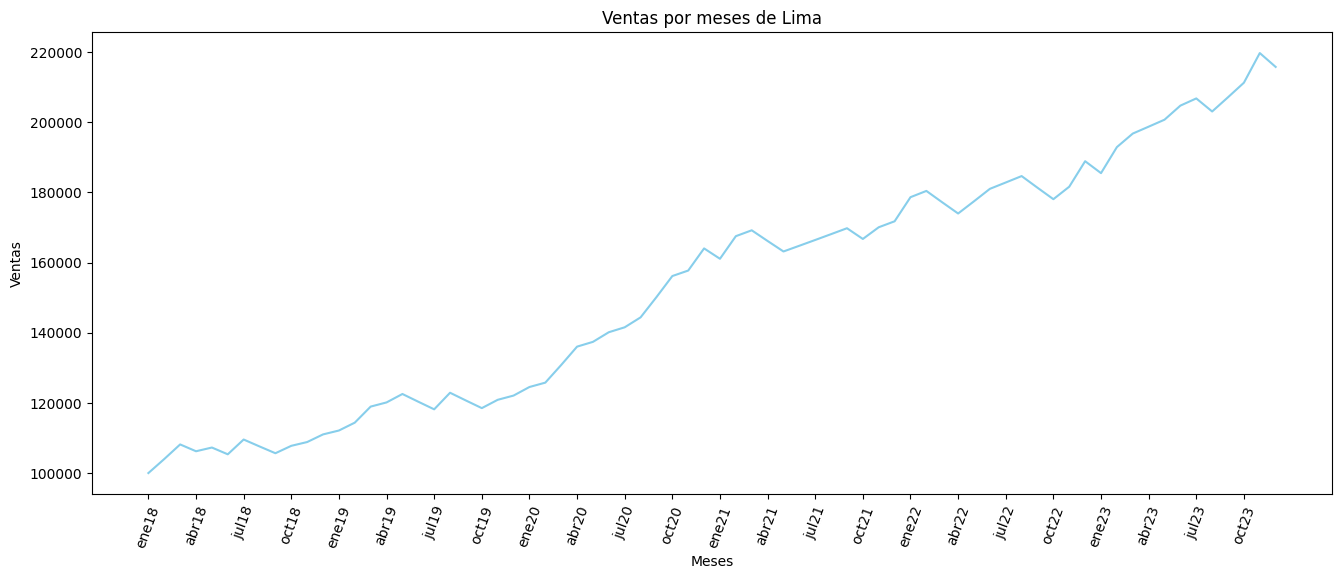

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(filtrado['Mes_Año'],filtrado['Ventas'], color='skyblue')
plt.title('Ventas por meses de Lima')
plt.xlabel('Meses')
plt.ylabel('Ventas')
plt.xticks(range(0,6*12,3),rotation=70)
plt.show()

# Ejercicio 2

Haz un grafico del evolutivo de ventas mensual en Chiclayo

In [ ]:
ventas=df[df['Ciudad']=='Chiclayo']
evo=ventas.groupby(['Mes', 'Año'])[['Ventas']].sum()
evo.tail()

Ventas
Mes        Año                
septiembre 2019   60339.720968
           2020   75075.975753
           2021   84891.402630
           2022   90662.775504
           2023  103560.696003

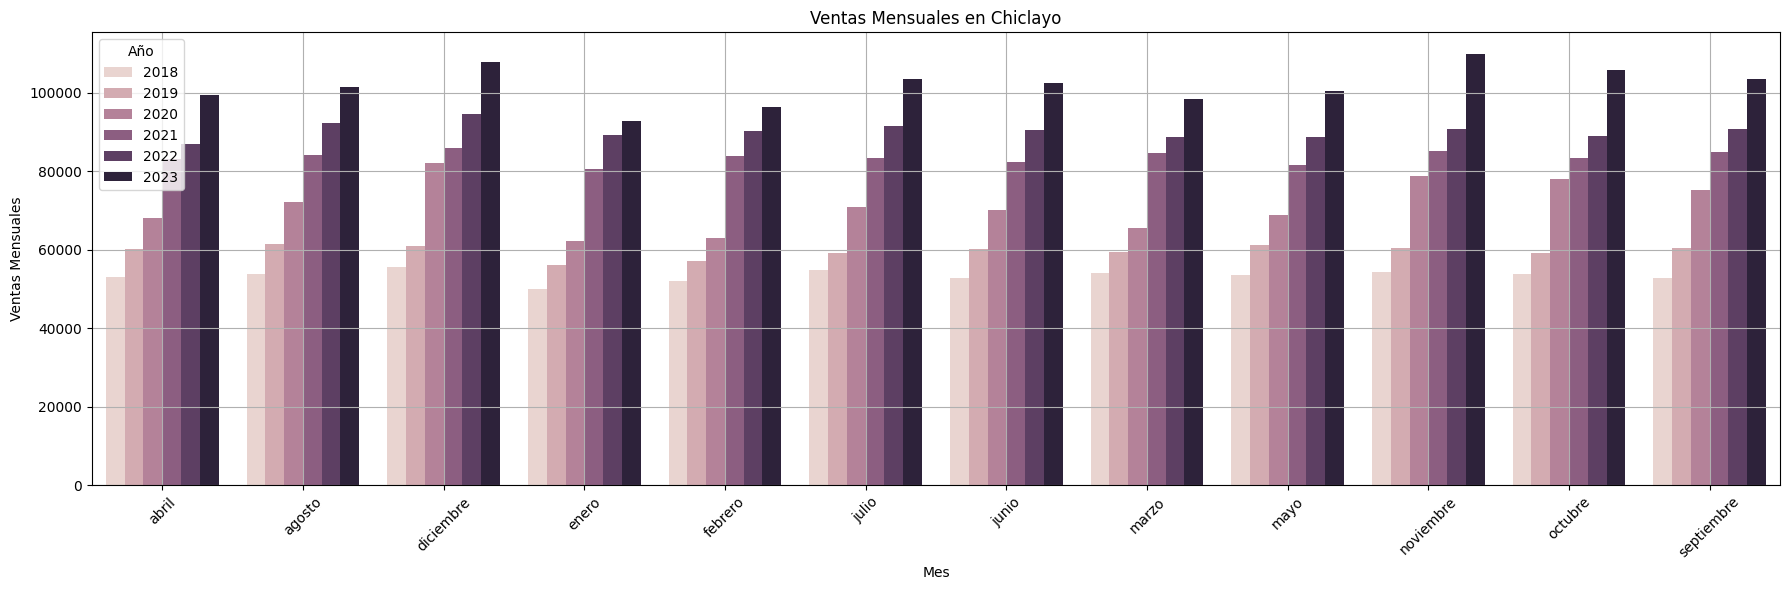

In [ ]:
import seaborn as sns




plt.figure(figsize=(18, 6))
sns.barplot(data=evo, x='Mes', y='Ventas', hue='Año')
plt.xlabel('Mes')
plt.ylabel('Ventas Mensuales')
plt.title('Ventas Mensuales en Chiclayo')
plt.legend(title='Año')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Ejercicio 3

Haz un gráfico de pie con el evolutivo de  ventas totales por ciudad en el año 2023

In [ ]:
año=df[df['Año']==2023]
evolutivo=año.groupby(['Ciudad'])[['Ventas']].sum().reset_index()
evolutivo

,Ciudad,Ventas
0,Chiclayo,1.221525e+06
1,Iquitos,7.939915e+05
2,Lima,2.443051e+06
3,Trujillo,1.587983e+06


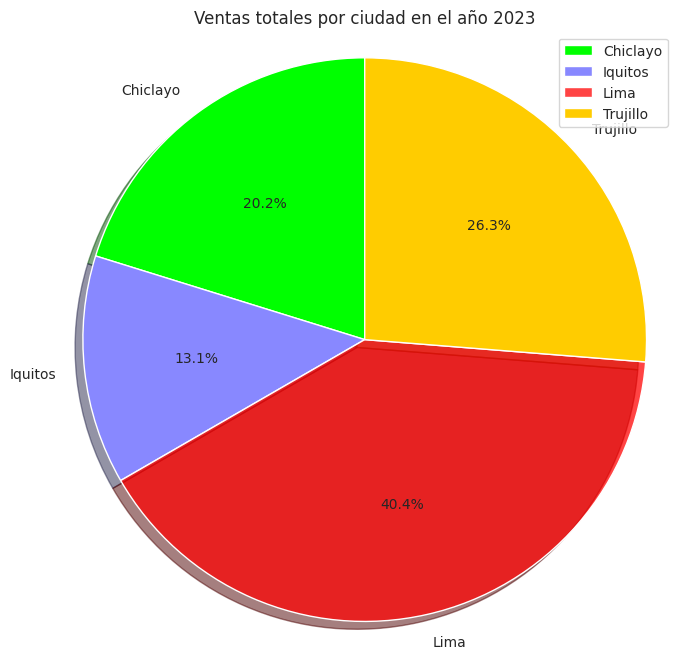

In [ ]:
colors = ['#00FF00', '#8888FF', '#FF0000BB', '#ffcc00']


plt.figure(figsize=(8, 8))
plt.pie(evolutivo['Ventas'].values, labels=evolutivo['Ciudad'].values, autopct='%0.1f%%', colors=colors, startangle=90, shadow=True)
plt.axis('equal')
plt.title('Ventas totales por ciudad en el año 2023')


plt.legend(loc='upper right')


plt.show()